In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\wcp\worldcities.csv")

In [5]:
df.shape

(48056, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48056 entries, 0 to 48055
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        48056 non-null  object 
 1   city_ascii  48055 non-null  object 
 2   lat         48056 non-null  float64
 3   lng         48056 non-null  float64
 4   country     48056 non-null  object 
 5   iso2        48023 non-null  object 
 6   iso3        48056 non-null  object 
 7   admin_name  47855 non-null  object 
 8   capital     15137 non-null  object 
 9   population  47805 non-null  float64
 10  id          48056 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB


In [7]:
df.describe()

,lat,lng,population,id
count,48056.000000,48056.000000,4.780500e+04,4.805600e+04
mean,25.389866,16.247695,1.078622e+05,1.447218e+09
std,22.982238,70.462216,6.855323e+05,2.611761e+08
min,-54.933300,-179.600000,0.000000e+00,1.004003e+09
25%,12.192200,-44.159325,1.219100e+04,1.250541e+09
50%,30.927950,14.480550,2.091400e+04,1.380340e+09
75%,42.617200,77.081975,4.683100e+04,1.704000e+09
max,81.716600,179.366700,3.778500e+07,1.934976e+09


In [8]:
df.isna().sum()

city              0
city_ascii        1
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      201
capital       32919
population      251
id                0
dtype: int64

In [27]:
df.dropna(subset=['population'])

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,None,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,None,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,None,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,None,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,None,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47800,Kostel,Kostel,45.5088,14.9100,Slovenia,SI,SVN,None,admin,10.0,1705541759
47801,Kingoonya,Kingoonya,-30.9170,135.3147,Australia,AU,AUS,None,NaN,4.0,1036942792
47823,Chuquicamata,Chuquicamata,-22.3169,-68.9301,Chile,CL,CHL,None,NaN,0.0,1152468996
47966,Nordvik,Nordvik,73.9975,111.4633,Russia,RU,RUS,None,NaN,0.0,1643587468


In [28]:
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,None,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,None,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,None,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,None,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,None,admin,24973000.0,1356226629


In [29]:
df.isna().sum()

city              0
city_ascii      251
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name    48056
capital       32919
population      251
id                0
dtype: int64

In [30]:
# 1. fill missing value in city_ascii
df['city_ascii'] = df['city_ascii'].fillna(df['city'])

In [31]:
# recheck isna
df.isna().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name    48056
capital       32919
population      251
id                0
dtype: int64

In [32]:
# 2. missing admin_name with 'unknown'
df['admin_name'] = df['admin_name'].fillna('unknown')

In [33]:
# recheck isna
df.isna().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name        0
capital       32919
population      251
id                0
dtype: int64

In [36]:
# 3. dropna from population
df = df.dropna(subset=['population'])

In [37]:
df.isna().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name        0
capital       32879
population        0
id                0
dtype: int64

In [39]:
df['capital'].fillna('0', inplace=True)

In [40]:
df.to_csv(r'C:\Users\Admin\Downloads\wcp\cleaned_dataset.csv', index=False)

In [41]:
# Basic Visualization

import matplotlib.pyplot as plt
import seaborn as sns

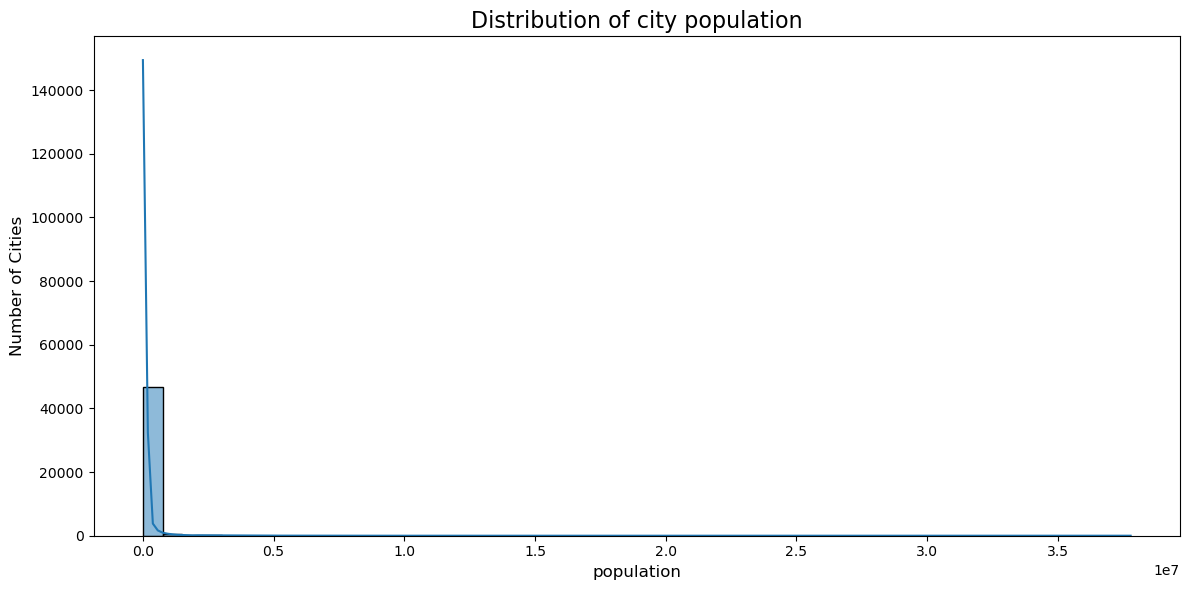

In [48]:
# Population distribution of cities
plt.figure(figsize=(12,6))
sns.histplot(df['population'], bins=50, kde=True)
plt.title('Distribution of city population', fontsize=16)
plt.xlabel('population', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
# sort the df 
top_cities = df.sort_values(by= 'population', ascending=False).head(20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29600\1083023490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='population', y='city', palette='viridis')


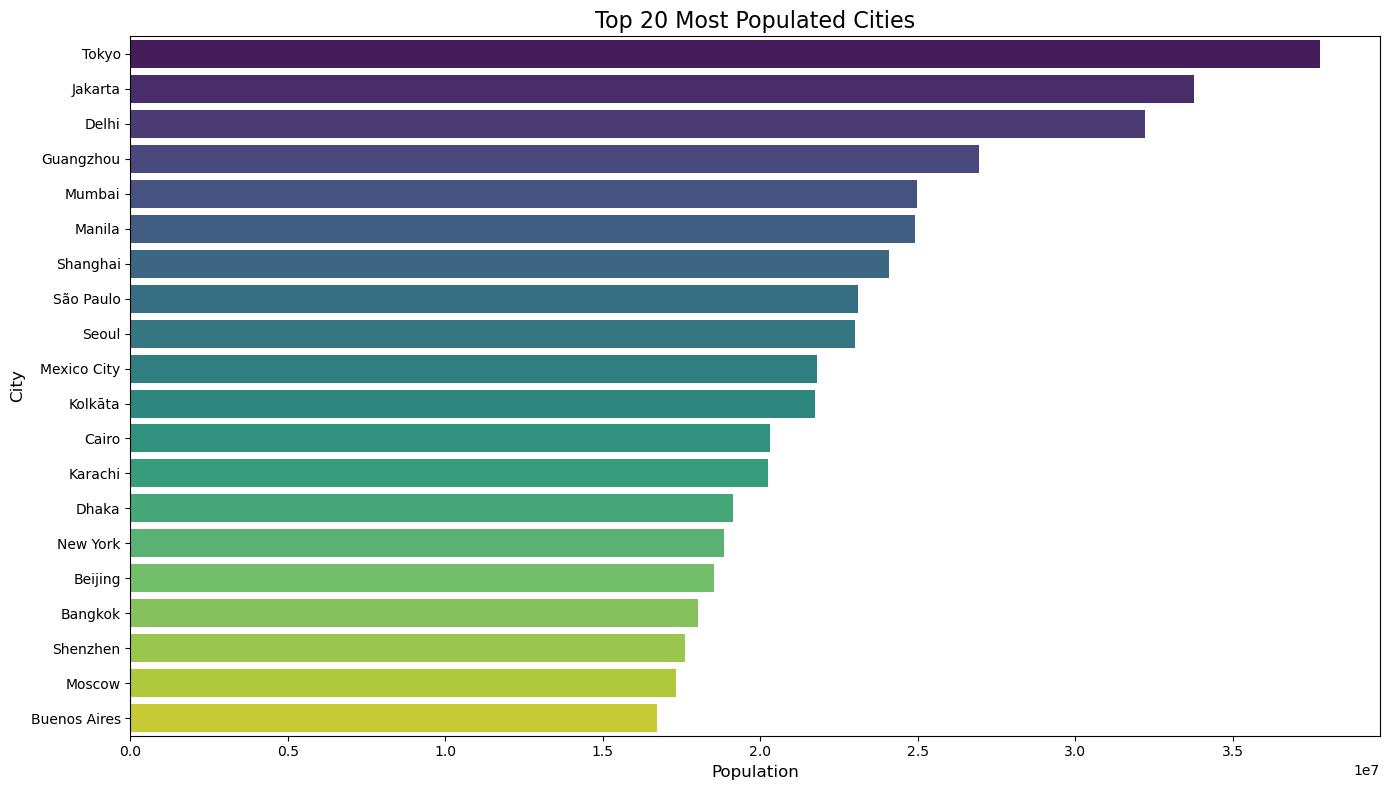

In [51]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_cities, x='population', y='city', palette='viridis')
plt.title('Top 20 Most Populated Cities', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()